# Feature extraction from ROI of palm print

## Import libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
import cv2
from skimage.feature import graycomatrix, graycoprops



sample_image

In [8]:
roi_sample = 'ROI_sample.jpg'

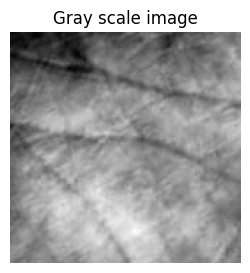

In [11]:
def read_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Không thể tìm thấy tệp: {image_path}")
    
    return image

image = read_image(roi_sample)

plt.figure(figsize=(3, 3))
plt.title("Gray scale image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()



In [14]:
# tính toán GLCM và trích xuất các đặc trưng
def extract_glcm_features(image, distances, andgles):
    # Tinhs GLCM
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

    # Trích xuất các đặc trưng
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    asm = graycoprops(glcm, 'ASM')

    # Tổng hợp các đặc trưng
    features = {
        'contrast': contrast.mean(),
        'dissimilarity': dissimilarity.mean(),
        'homogeneity': homogeneity.mean(),
        'energy': energy.mean(),
        'correlation': correlation.mean(),
        'ASM': asm.mean()
    }
    return features



distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Trích xuất các đặc trưng GLCM
features = extract_glcm_features(image, distances, angles)


print("Các đặc trưng GLCM:")
for key, value in features.items():
    print(f"{key}: {value}")
    

Các đặc trưng GLCM:
contrast: 5.795925343137687
dissimilarity: 1.7581687728928916
homogeneity: 0.43462872652616097
energy: 0.07048092376616207
correlation: 0.9609316347719941
ASM: 0.005069373412652934


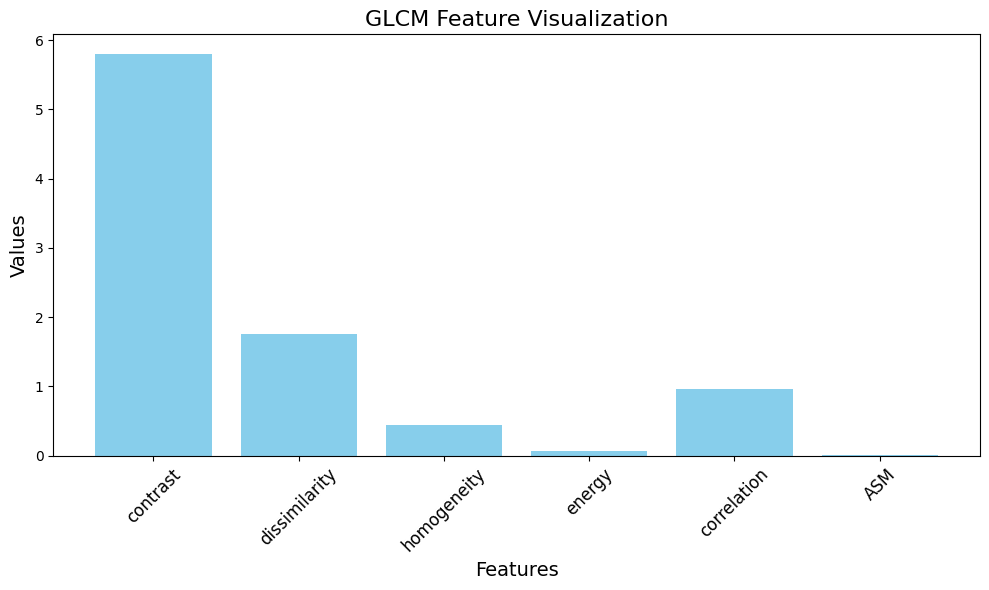

In [16]:
# Trực quan hóa các đặc trưng
def visualize_features(features):
    labels = list(features.keys())
    values = list(features.values())

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('GLCM Feature Visualization', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()


 # Trực quan hóa kết quả
visualize_features(features)


# Adaptive thresholding

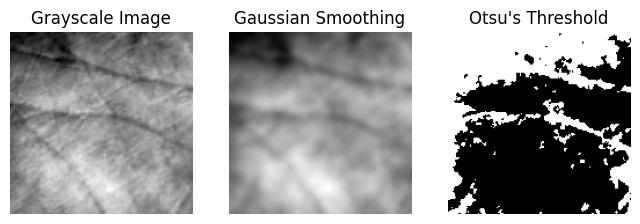

Binary image saved at: Test\hand_binary_otsu.jpg


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img_name = 'ROI_sample.jpg' 
image = cv2.imread(img_name)
if image is None:
    raise ValueError("Image not found. Please check the path and filename.")

# Step 1: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian smoothing to reduce noise
gaussian_blur = cv2.GaussianBlur(gray_image, (15, 15), 0)

# Step 3: Apply Otsu's thresholding to create a binary mask
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Display the result
plt.figure(figsize=(8, 6))
plt.subplot(1, 3, 1)
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Gaussian Smoothing")
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Otsu's Threshold")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()

# Save the final binary image
output_folder = 'Test'
os.makedirs(output_folder, exist_ok=True)
binary_image_path = os.path.join(output_folder, 'hand_binary_otsu.jpg')
cv2.imwrite(binary_image_path, binary_image)
print(f"Binary image saved at: {binary_image_path}")


TypeError: Invalid shape (2, 158, 158) for image data

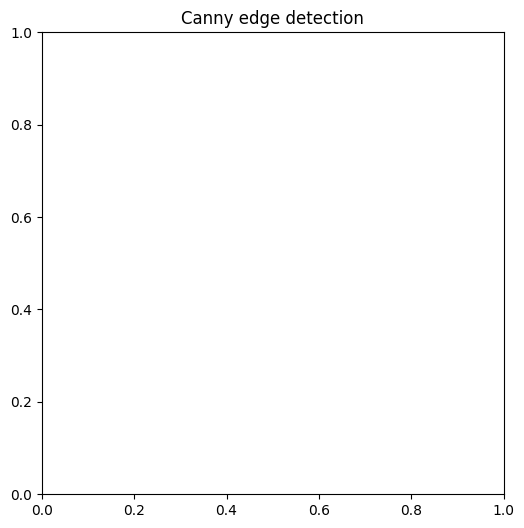

In [27]:
def detect_edges(image_path, blur_ksize=5, low_threshold=50, high_threshold=150):
    """
    Perform edge detection using the Canny method with adjustable parameters.

    Parameters:
        image_path (str): Path to the input image.
        blur_ksize (int): Kernel size for Gaussian blur (must be odd).
        low_threshold (int): Lower threshold for the hysteresis procedure.
        high_threshold (int): Upper threshold for the hysteresis procedure.

    Returns:
        original_image (numpy.ndarray): Original grayscale image.
        edges (numpy.ndarray): Binary image showing edges.
    """
    # Load the grayscale image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if original_image is None:
        raise FileNotFoundError("Image not found at the specified path.")

    # Apply Gaussian Blur to reduce noise
    blurred_image = cv2.GaussianBlur(original_image, (blur_ksize, blur_ksize), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

    return original_image, edges

canny = detect_edges(image_path=roi_sample)


plt.figure(figsize=(6, 6))
plt.title("Canny edge detection")
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()


